This file is to test for distributions and how we can plot stuff.

Import all necessary libraries.

In [9]:
import random # Used for random generation of points
import matplotlib.pyplot as plt # Used for visualization of distributions and classifiction
# import numpy as np 
import pandas as pd # Used for simplification of plotting points
import math # Used for various math utilities

Random distribution of points in a 1x1 box.

In [10]:
def generateSingleSquareRandomDistribution():
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    df = pd.DataFrame({'x': [0], 'y': [0]})
    for _ in range(1000):
        plt.plot(random.random(), random.random(), marker='o', markersize=2, color="red")

# generateSingleSquareRandomDistribution()

2 random distributions of points in a 1x1 box. 

In [11]:
def generateDoubleSquareRandomDistribution():
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    df = pd.DataFrame({'x': [0], 'y': [0]})
    for _ in range(1000):
        plt.plot(random.random(), random.random(), marker='o', markersize=2, color="red")
        plt.plot(random.random(), random.random(), marker='o', markersize=2, color="blue")

# generateDoubleSquareRandomDistribution()

Random distribution of points in a circle of radius 1.

In [23]:
def generateSingleCircleDistribution():
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    cluster_x, cluster_y = 0, 0
    df = pd.DataFrame({'x': [cluster_x], 'y': [cluster_y]})

    circle_r = 0.5
    circle_x = 0.5
    circle_y = 0.5

    for _ in range(1000):
        alpha = 2 * math.pi * random.random()
        r = circle_r * math.sqrt(random.random())
        x = r * math.cos(alpha) + circle_x
        y = r * math.sin(alpha) + circle_y
        plt.plot(cluster_x + x, cluster_y + y, marker='o', markersize=2, color="blue")

# generateSingleCircleDistribution()

Distribution of points in 1 circle and 1 box, overlaid on top of each other.

In [24]:
def generateSingleCircleAndSingleSquareDistribution():
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    cluster_x, cluster_y = 0, 0
    df = pd.DataFrame({'x': [cluster_x], 'y': [cluster_y]})

    circle_r = 0.5
    circle_x = 0.5
    circle_y = 0.5

    for _ in range(1000):
        alpha = 2 * math.pi * random.random()
        r = circle_r * math.sqrt(random.uniform(0, 0.2))
        x = r * math.cos(alpha) + circle_x
        y = r * math.sin(alpha) + circle_y
        plt.plot(cluster_x + x, cluster_y + y, marker='o', markersize=2, color="blue")
        plt.plot(random.random(), random.random(), marker='o', markersize=2, color="red")

# generateSingleCircleAndSingleSquareDistribution()

Distribution of points in multiple circles and 1 box, overlaid on top of each other.

({0: [0.09021038950418137, 0.4996927597408014, 0.4120574814564446],
  1: [0.4215825827086129, 0.04464713432591494, 0.3676647182784732]},
            x         y    color
 0   0.232180  0.823249  #1d4380
 0   0.329954  1.000000  #1d4380
 0   0.305074  0.942960  #1d4380
 0   0.142712  0.892426  #1d4380
 0   0.075289  1.000000  #1d4380
 ..       ...       ...      ...
 0   0.908509  0.237293  #253297
 0   0.708551  0.000000  #253297
 0   0.780524  0.207102  #253297
 0   0.793572  0.232637  #253297
 0   0.807247  0.000000  #253297
 
 [2000 rows x 3 columns])

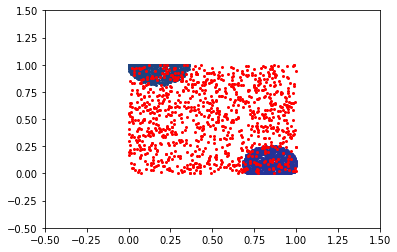

In [27]:
def generateMultipleCircleAndSingleSquareDistribution():
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)

    number_of_clusters = random.randint(2, 4)

    df = pd.DataFrame({'x': [], 'y': [], 'color': []})

    cluster_map = {}
    for cluster_num in range(number_of_clusters):
        cluster_map[cluster_num] =  [random.uniform(0, 0.5), random.uniform(0, 0.5), random.uniform(0, 0.5)]    

    for cluster in cluster_map.keys():
        cluster_x, cluster_y, cluster_r = cluster_map[cluster]
        color = "#" + "%06x" % random.randint(0, 0xFFFFFF)
        for _ in range(1000):
            alpha = 2 * math.pi * random.random()
            r = cluster_r * math.sqrt(random.uniform(0, 0.2))
            x = r * math.cos(alpha) + cluster_x
            y = r * math.sin(alpha) + cluster_y
            bound_x = max(0, min(1, cluster_x + x))
            bound_y = max(0, min(1, cluster_y + y))
            plt.plot(bound_x, bound_y, marker='o', markersize=2, color=color)
            df = df.append(pd.DataFrame({'x': bound_x, 'y': [bound_y], 'color': [color]}))

    for _ in range(1000):
        plt.plot(random.random(), random.random(), marker='o', markersize=2, color="red")

    plt.plot()
    return cluster_map, df

generateMultipleCircleAndSingleSquareDistribution()

In [ ]:
def splitCircleAndSquareDistribution():
    cluster_map, points_df = generateMultipleCircleAndSingleSquareDistribution()

    for cluster in cluster_map.keys():
        